# Time Series

## Minimum daily temperature dataset

In [82]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [110]:
series = pd.read_csv('AirPassengers.csv', header=0)
series.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


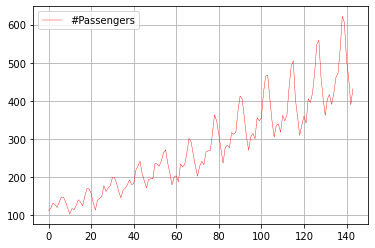

In [111]:
series.plot(color="red",linewidth=0.4)
plt.grid()
plt.show()

### Quick view of the autocorrelation

In [112]:
series = series['#Passengers']

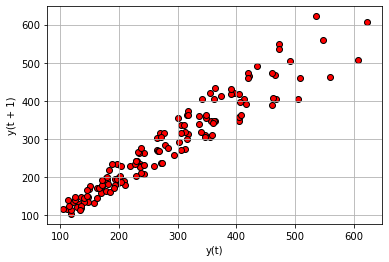

In [113]:
ax = plt.figure(2)
plt.grid()
ax = pd.plotting.lag_plot(series,lag=1,c="red",edgecolors="black")
plt.show()

In [114]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
result

,t,t+1
t,1.000000,0.960195
t+1,0.960195,1.000000


### Let's test if we can check auto-correlation with the 50 th term 

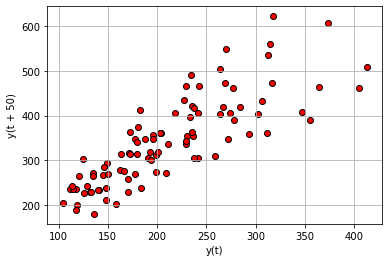

In [115]:
ax = plt.figure(3)
plt.grid()
ax = pd.plotting.lag_plot(series,lag=50,c="red",edgecolors="black")
plt.show()

In [116]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(50), values], axis=1)
dataframe.columns = ['t', 't+50']
result = dataframe.corr()
result

,t,t+50
t,1.00000,0.82272
t+50,0.82272,1.00000


### Let's test if we can check auto-correlation with the 100 th term 

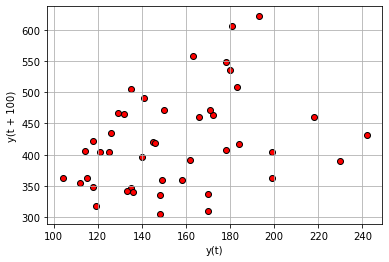

In [117]:
ax = plt.figure(4)
plt.grid()
ax = pd.plotting.lag_plot(series,lag=100,c="red",edgecolors="black")
plt.show()

In [118]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(100), values], axis=1)
dataframe.columns = ['t', 't+100']
result = dataframe.corr()
result

,t,t+100
t,1.000000,0.326303
t+100,0.326303,1.000000


### Correlation decrease with LAG

## For all values of shift

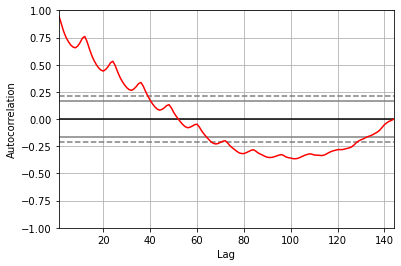

In [119]:
from pandas.plotting import autocorrelation_plot
plt.figure(5)
autocorrelation_plot(series, c="red")
plt.show()

## Now, let's take a look at the cross-correlation

#### Which means the correlation of two time series

In [139]:
from scipy import signal

x = np.arange(256) / 100
sig = np.sin(2 * np.pi * x)
sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, sig)
lags = signal.correlation_lags(len(sig), len(sig_noise))
#corr /= np.max(corr)
var_sig = np.var(sig)
var_sig_noise = np.var(sig_noise)
corr = corr/ np.sqrt(var_sig*var_sig_noise)


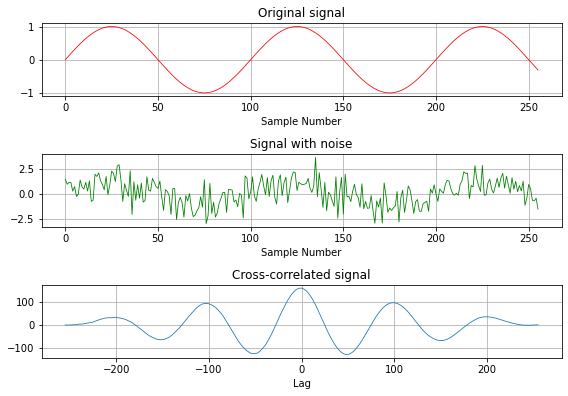

In [140]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(8, 5.6))
ax_orig.plot(sig, color='red',linewidth=0.8)
ax_orig.set_title('Original signal')
ax_orig.set_xlabel('Sample Number')
ax_orig.grid()
ax_noise.plot(sig_noise, color='green',linewidth=0.8)
ax_noise.set_title('Signal with noise')
ax_noise.set_xlabel('Sample Number')
ax_noise.grid()
ax_corr.plot(lags, corr,linewidth=0.8)
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
ax_corr.grid()
#ax_orig.margins(0, 0.1)
#ax_noise.margins(0, 0.1)
#ax_corr.margins(0, 0.1)
fig.tight_layout()
plt.show()

In [141]:
x = np.arange(256) / 100
sin_noise = np.sin(2 * np.pi * x) + np.random.randn(256)
cos_noise = np.cos(2 *np.pi*x) + np.random.randn(256)
corr = signal.correlate(sin_noise, cos_noise)
lags = signal.correlation_lags(len(sin_noise), len(cos_noise))
#corr /= np.max(corr)

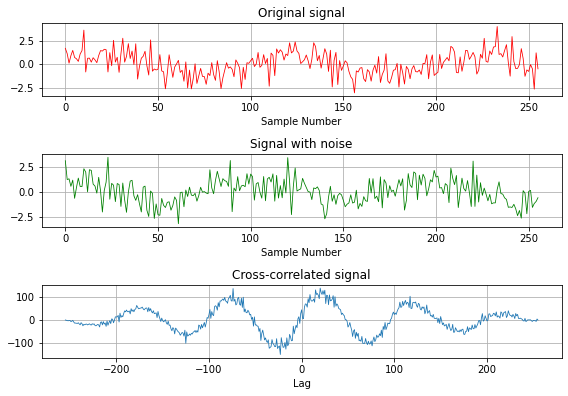

In [142]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(8, 5.6))
ax_orig.plot(sin_noise, color='red',linewidth=0.8)
ax_orig.set_title('Original signal')
ax_orig.set_xlabel('Sample Number')
ax_orig.grid()
ax_noise.plot(cos_noise, color='green',linewidth=0.8)
ax_noise.set_title('Signal with noise')
ax_noise.set_xlabel('Sample Number')
ax_noise.grid()
ax_corr.plot(lags, corr,linewidth=0.8)
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
ax_corr.grid()
#ax_orig.margins(0, 0.1)
#ax_noise.margins(0, 0.1)
#ax_corr.margins(0, 0.1)
fig.tight_layout()
plt.show()